In [1]:
from manim import *
from pathlib import Path
import shutil
import time
import json
import os
scale_res=1
scale_res=4

params = f" -v WARNING -r {170*scale_res},{170*scale_res} -s  --disable_caching Example"

name_snippet_pairs = {}

Manim Community v0.10.0

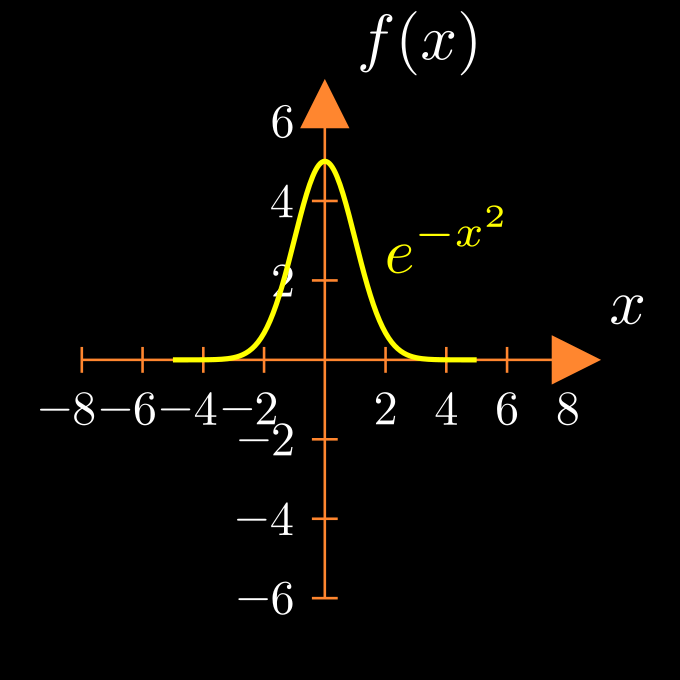

In [116]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        axes = Axes(
            x_range=[-8, 9, 2],
            y_range=[-6, 7, 2],
            x_length=4,
            y_length=4,
            axis_config={"include_numbers": True, "numbers_to_exclude": [0]},
            x_axis_config={"color": ORANGE},
            y_axis_config={"color": ORANGE},
        )
        axes_label = axes.get_axis_labels(x_label="x", y_label="f(x)")
        graph = axes.get_graph(lambda x: 5*np.e ** (-x**2/2), x_range=[-5, 5], color=YELLOW)
        graph_label = axes.get_graph_label(graph, label="e^{-x^2}", color=YELLOW, x_val=1,dot=False)
        self.add(axes, graph, graph_label, axes_label)
        self.camera.frame.scale(1/2.7)

###******        
image_full_name = "Axes_e_x.png"
snippet = r"""
axes = Axes(
    x_range=[-8, 9, 2],
    y_range=[-6, 7, 2],
    x_length=4,
    y_length=4,
    axis_config={"include_numbers": True, "numbers_to_exclude": [0]},
    x_axis_config={"color": ORANGE},
    y_axis_config={"color": ORANGE},
)
axes_label = axes.get_axis_labels(x_label="x", y_label="f(x)")
graph = axes.get_graph(lambda x: 5*np.e ** (-x**2/2), x_range=[-5, 5], color=YELLOW)
graph_label = axes.get_graph_label(graph, label="e^{-x^2}", color=YELLOW, x_val=1,dot=False)
"""
name_snippet_pairs[image_full_name] = snippet

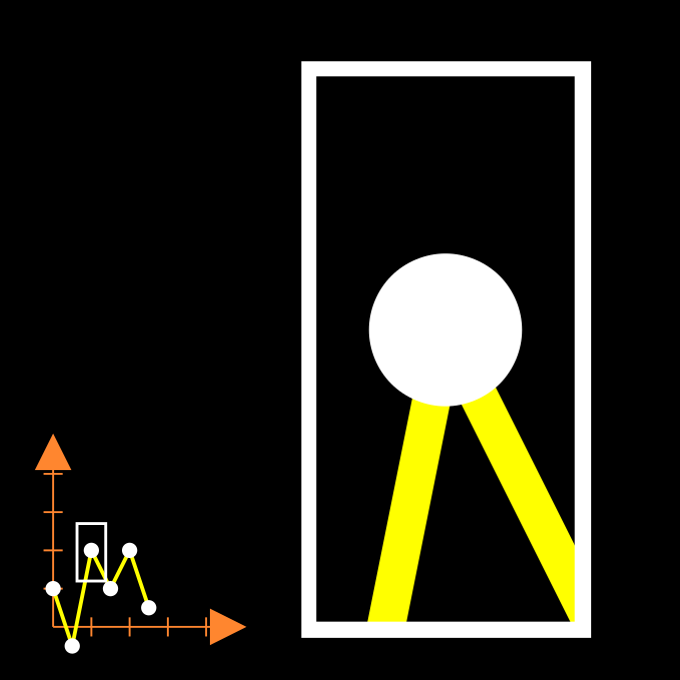

In [117]:
%%manim $params
class Example(ZoomedScene): 
    def __init__(self, **kwargs):
        ZoomedScene.__init__(
            self,
            zoom_factor=0.1,
            zoomed_display_height=6,
            zoomed_display_width=3,
            image_frame_stroke_width=20,
            zoomed_camera_config={
                "default_frame_stroke_width": 3,
            },
            **kwargs
        )    

    def construct(self):
        self.activate_zooming(animate=False)

        ax = Axes(
            x_range=[0, 10, 2],
            y_range=[0,10, 2],
            x_length=2,
            y_length=2,
            x_axis_config={"color": ORANGE},
            y_axis_config={"color": ORANGE},
        )
        ax.shift(DL)
        x_vals = [0, 1, 2, 3,4,5]
        y_vals = [2, -1, 4, 2, 4, 1]
        graph = ax.get_line_graph(x_values=x_vals, y_values=y_vals)
        self.zoomed_camera.frame.move_to(graph.get_top()+0.1*DL)
        self.zoomed_display.shift(3*LEFT+0.4*UP)
        self.camera.frame.scale(1/2)
        self.camera.frame.shift(UR*1)

        self.add(ax, graph)

###******        
image_full_name = "Axes_zoom.png"
snippet = r"""
class Example(ZoomedScene): 
    def __init__(self, **kwargs):
        ZoomedScene.__init__(
            self,
            zoom_factor=0.1,
            zoomed_display_height=6,
            zoomed_display_width=3,
            image_frame_stroke_width=20,
            zoomed_camera_config={
                "default_frame_stroke_width": 3,
            },
            **kwargs
        )    

    def construct(self):
        self.activate_zooming(animate=False)

        ax = Axes(
            x_range=[0, 10, 2],
            y_range=[0,10, 2],
            x_length=2,
            y_length=2,
            x_axis_config={"color": ORANGE},
            y_axis_config={"color": ORANGE},
        )
        ax.shift(DL)
        x_vals = [0, 1, 2, 3,4,5]
        y_vals = [2, -1, 4, 2, 4, 1]
        graph = ax.get_line_graph(x_values=x_vals, y_values=y_vals)
        self.zoomed_camera.frame.move_to(graph.get_top()+0.1*DL)
        self.zoomed_display.shift(3*LEFT+0.4*UP)
"""
name_snippet_pairs[image_full_name] = snippet

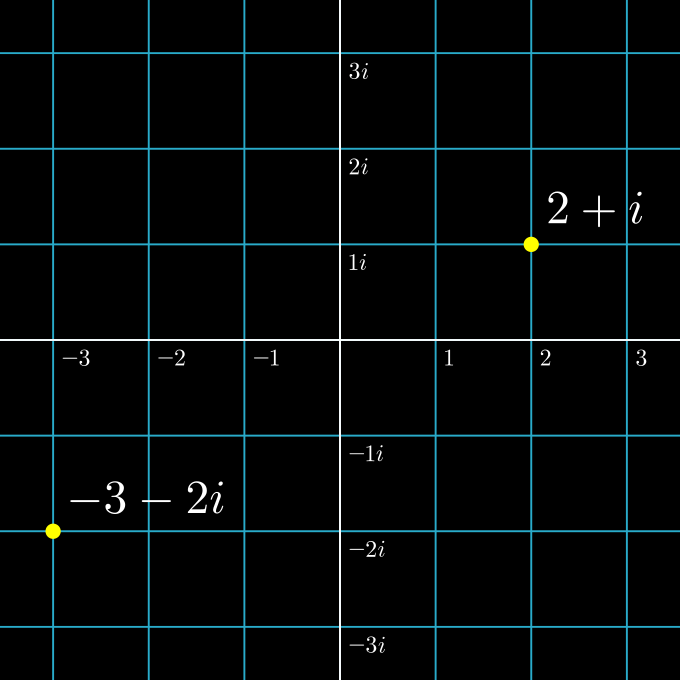

In [118]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        plane = ComplexPlane().add_coordinates()
        d1 = Dot(plane.n2p(2 + 1j), color=YELLOW)
        d2 = Dot(plane.n2p(-3 - 2j), color=YELLOW)
        label1 = MathTex("2+i").next_to(d1, UR, 0.1)
        label2 = MathTex("-3-2i").next_to(d2, UR, 0.1)
        self.add(plane, d1,label1,d2,label2)
        self.camera.frame.scale(1/2)
###******       
image_full_name = "ComplexPlane.png"
snippet =  r"""
plane = ComplexPlane().add_coordinates()
d1 = Dot(plane.n2p(2 + 1j), color=YELLOW)
d2 = Dot(plane.n2p(-3 - 2j), color=YELLOW)
label1 = MathTex("2+i").next_to(d1, UR, 0.1)
label2 = MathTex("-3-2i").next_to(d2, UR, 0.1)
"""
name_snippet_pairs[image_full_name] = snippet

[09/19/21 17:51:59] WARNING  The method CoordinateSystem.get_center_point  ]8;id=1632066719.350848-873751;file:///Users/jan-hendrik/projects/manim/manim/utils/deprecation.py\deprecation.py]8;;\:210
                             has been deprecated since v0.10.0 and is                        
                             expected to be removed after v0.11.0. Use                       
                             get_origin instead.

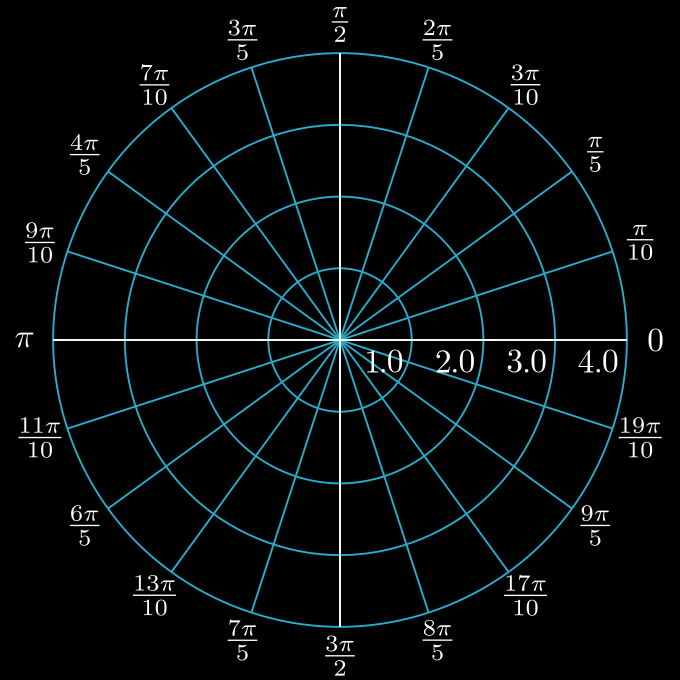

In [119]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        polarplane_pi = PolarPlane(
            azimuth_units="PI radians",
            size=6,
            azimuth_label_font_size=33.6,
            radius_config={"font_size": 33.6},
        ).add_coordinates()
        self.add(polarplane_pi)
        self.camera.frame.scale(1/2)
###******       
image_full_name = "PolarPlane.png"
snippet =  r"""
polarplane_pi = PolarPlane(
            azimuth_units="PI radians",
            size=6,
            azimuth_label_font_size=33.6,
            radius_config={"font_size": 33.6},
        ).add_coordinates()
"""
name_snippet_pairs[image_full_name] = snippet

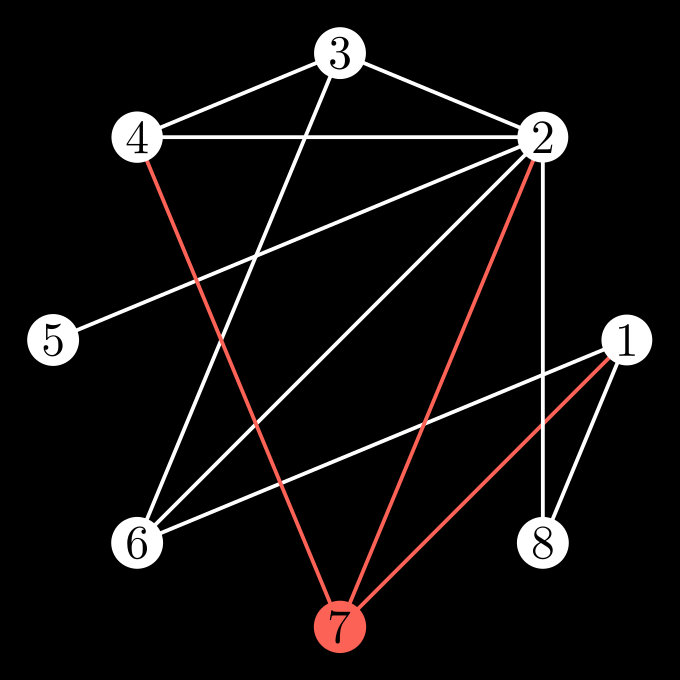

In [120]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5, 6, 7, 8]
        edges = [(1, 7), (1, 8), (2, 3), (2, 4), (2, 5),
                 (2, 8), (3, 4), (6, 1), (6, 2),
                 (6, 3), (7, 2), (7, 4)]
        g = Graph(vertices, edges, layout="circular", layout_scale=3,
                  labels=True, vertex_config={7: {"fill_color": RED}},
                  edge_config={(1, 7): {"stroke_color": RED},
                               (2, 7): {"stroke_color": RED},
                               (4, 7): {"stroke_color": RED}})
        self.add(g)
        self.camera.frame.scale(1/2)
###******       
image_full_name = "Graph_with_Number.png"
snippet = r"""
vertices = [1, 2, 3, 4, 5, 6, 7, 8]
edges = [(1, 7), (1, 8), (2, 3), (2, 4), (2, 5),
         (2, 8), (3, 4), (6, 1), (6, 2),
         (6, 3), (7, 2), (7, 4)]
g = Graph(vertices, edges, layout="circular", layout_scale=3,
          labels=True, vertex_config={7: {"fill_color": RED}},
          edge_config={(1, 7): {"stroke_color": RED},
                       (2, 7): {"stroke_color": RED},
                       (4, 7): {"stroke_color": RED}})
"""
name_snippet_pairs[image_full_name] = snippet

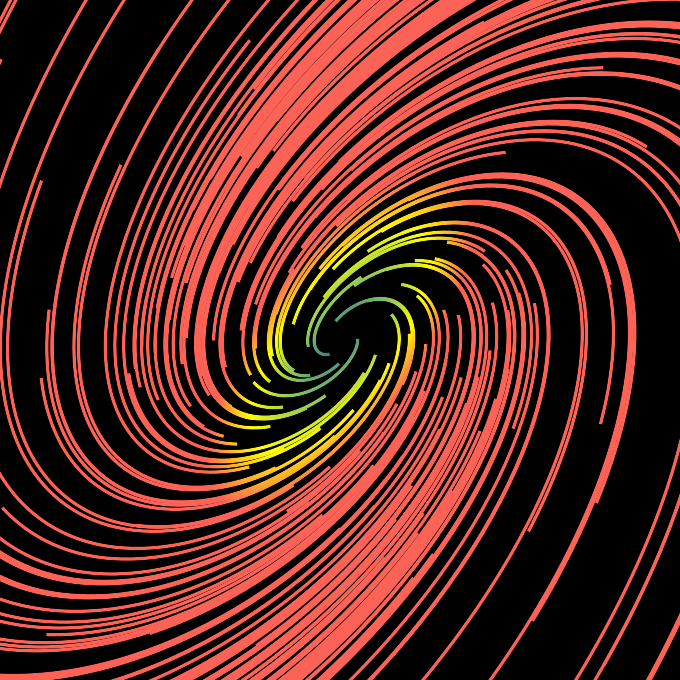

In [121]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        func = lambda pos: ((pos[0]*UR+pos[1]*LEFT) - pos)
        mob= StreamLines(func,delta_x=1, delta_y=1,stroke_width=3)
        self.add(mob)
        self.camera.frame.scale(1/2.5)
###******       
image_full_name = "StreamLines.png"
snippet = r"""
func = lambda pos: ((pos[0]*UR+pos[1]*LEFT) - pos)
mob= StreamLines(func,delta_x=1, delta_y=1,stroke_width=3)
self.add(mob)
"""
name_snippet_pairs[image_full_name] = snippet

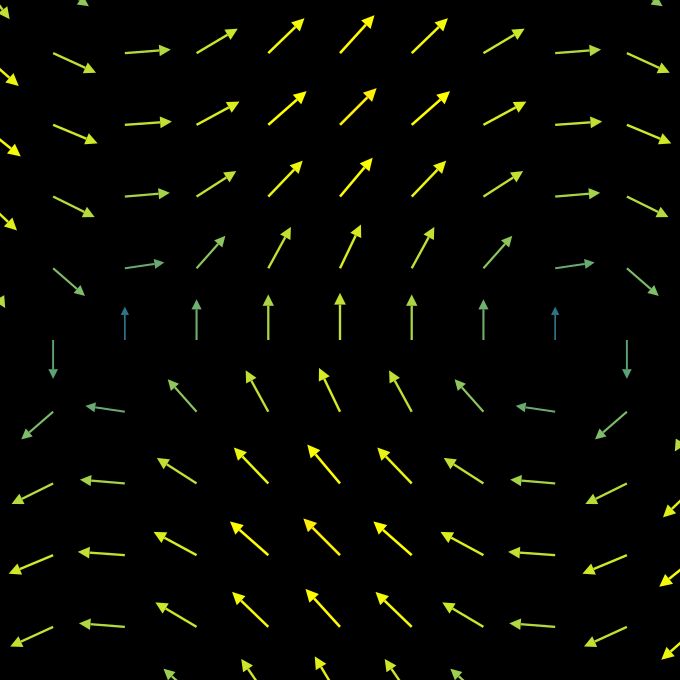

In [122]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        func = lambda pos: np.sin(pos[1])*RIGHT+np.cos(pos[0])*UP
        mob = ArrowVectorField(func)
        self.add(mob)
        self.camera.frame.scale(1/3)
###******       
image_full_name = "ArrowVectorField.png"
snippet = r"""
func = lambda pos: np.sin(pos[1])*RIGHT+np.cos(pos[0])*UP
mob = ArrowVectorField(func)
"""
name_snippet_pairs[image_full_name] = snippet
class ScaleVectorFieldFunction(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[1])*RIGHT+np.cos(pos[0])*UP
        vector_field = ArrowVectorField(func)
        self.add(vector_field)
        self.wait()

        func = VectorField.scale_func(func, 0.5)
        self.play(vector_field.animate.become(ArrowVectorField(func)))
        self.wait()

# Save here!

In [123]:
#pip install ipylab
from ipylab import JupyterFrontEnd

app = JupyterFrontEnd()
app.commands.execute('docmanager:save')

In [124]:
file_name = "Plots"

In [125]:
folder_name = file_name + "_files"
notebook_name = file_name + ".ipynb"
markdown_name = file_name + ".md"
!rm -r $folder_name
!jupyter nbconvert $notebook_name --to markdown
!rm -r $markdown_name
base_directory = Path.cwd() / folder_name
target_directory = Path.cwd() / "imgs"
target_directory.mkdir(parents=True, exist_ok=True)

prefix = file_name # delete files that where created in the past 
for file in target_directory.rglob("*"):
    if (prefix in file.name):
        file.unlink() 

paths = sorted(Path(base_directory).iterdir(), key=os.path.getmtime)
dest_names = list(name_snippet_pairs.keys())
new_keys = []
for num, (p,des) in enumerate(zip(paths,dest_names)):
    to_path = target_directory /  f"{file_name}_{num:03}_{des}"   
    shutil.copy(p,  to_path)
    new_keys.append(to_path.name)
    
new_name_snippet_pairs ={} 
new_values = list(name_snippet_pairs.values())
for key, value in zip(new_keys,new_values):
    if value.startswith("\n"):
        value = value[1:]
    if value.endswith("\n"):
        value = value[:-1]
    new_name_snippet_pairs[key]=value
with open(f'imgs/{file_name}.json', 'w') as fp:
    json.dump(new_name_snippet_pairs, fp,indent=2)
display(new_name_snippet_pairs)
!rm -r $folder_name
!git add .

rm: Plots_files: No such file or directory
[NbConvertApp] Converting notebook Plots.ipynb to markdown
[NbConvertApp] Support files will be in Plots_files/
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Writing 10875 bytes to Plots.md


{'Plots_000_Axes_e_x.png': 'axes = Axes(\n    x_range=[-8, 9, 2],\n    y_range=[-6, 7, 2],\n    x_length=4,\n    y_length=4,\n    axis_config={"include_numbers": True, "numbers_to_exclude": [0]},\n    x_axis_config={"color": ORANGE},\n    y_axis_config={"color": ORANGE},\n)\naxes_label = axes.get_axis_labels(x_label="x", y_label="f(x)")\ngraph = axes.get_graph(lambda x: 5*np.e ** (-x**2/2), x_range=[-5, 5], color=YELLOW)\ngraph_label = axes.get_graph_label(graph, label="e^{-x^2}", color=YELLOW, x_val=1,dot=False)',
 'Plots_001_Axes2.png': 'axes = Axes(\n    x_range=[-8, 9, 2],\n    y_range=[-6, 7, 2],\n    x_length=4,\n    y_length=4,\n    axis_config={"include_numbers": True, "numbers_to_exclude": [0]},\n    x_axis_config={"color": PINK},\n    y_axis_config={"color": ORANGE},\n)\naxes_label = axes.get_axis_labels(x_label="x", y_label="y")\ngraph = axes.get_graph(lambda x: np.e ** x, x_range=[-8, 2], color=GREEN_E)\ngraph_label = axes.get_graph_label(graph, label="e^x", color=YELLOW)',